<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/6thWeekTasks/Clustering_model_on_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Ketut Satria Wibisana**

**NIM : 1103213148**

**Lecture Week 6 : Clustering model**

**Dataset : Online Retail.xlsx**

**Dokumentasi Chat GPT :** [Link](https://chatgpt.com/share/672e2f4a-d464-8001-abe9-0b37af36aa06)

**Prompt: Beri kode untuk connect gcolab dengan gdrive!**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [4]:
# Membaca file Excel
file_path = '/content/drive/MyDrive/Dataset/Online Retail.xlsx'  # Ganti dengan path file Excel di Google Drive
df = pd.read_excel(file_path)





In [5]:
# Menampilkan informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Prompt: Aku punya dataset berikut: Online Retail.xlsx Dan informasi terkait dataframe saya sebagai berikut:**
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
**dan data head sebagai berikut:**
     InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6  
**beri kode untuk membuat Pipeline tiga model clustering**

In [6]:
# Mengisi nilai yang hilang untuk CustomerID dan fitur lainnya, jika ada
df['CustomerID'] = df['CustomerID'].fillna(-1)
df['Quantity'] = df['Quantity'].fillna(0)  # Contoh pengisian untuk Quantity
df['UnitPrice'] = df['UnitPrice'].fillna(0)  # Contoh pengisian untuk UnitPrice

In [7]:
# Memeriksa apakah masih ada nilai yang hilang
print("Nilai yang hilang sebelum PCA:")
print(df.isnull().sum())

Nilai yang hilang sebelum PCA:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [8]:
# Memilih fitur yang akan digunakan untuk clustering
features = df[['Quantity', 'UnitPrice', 'CustomerID']]

In [9]:
# Menggunakan PCA untuk mengurangi dimensi
pca = PCA(n_components=2)  # Mengurangi menjadi 2 komponen untuk visualisasi lebih mudah


In [10]:
# Normalisasi fitur sebelum PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [11]:
# Memeriksa apakah ada nilai NaN setelah normalisasi
if pd.isnull(features_scaled).any():
    print("Masih ada nilai NaN setelah normalisasi.")
else:
    # Menerapkan PCA pada data yang sudah dinormalisasi
    features_pca = pca.fit_transform(features_scaled)

In [12]:
# Membuat pipeline untuk setiap model clustering
def create_clustering_pipeline(model):
        return Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Mengisi nilai yang hilang
            ('scaler', StandardScaler()),  # Normalisasi fitur
            ('clustering', model)  # Model clustering
        ])

In [13]:
 # Fitting dan mendapatkan hasil clustering untuk MiniBatchKMeans
mbkmeans_model = create_clustering_pipeline(MiniBatchKMeans(n_clusters=5, random_state=42))
df['MiniBatchKMeans_Labels'] = mbkmeans_model.fit_predict(features)

In [14]:
# Ambil sampel lebih kecil untuk Agglomerative Clustering
sample_size = 5000  # Mengambil sampel 5000 entri untuk menghindari masalah memori
df_sample = df.sample(n=sample_size, random_state=42)

In [15]:
 # Fitting dan mendapatkan hasil clustering untuk Agglomerative Clustering
agg_model = create_clustering_pipeline(AgglomerativeClustering(n_clusters=5))
df_sample['Agglomerative_Labels'] = agg_model.fit_predict(features_scaled[:sample_size])

In [16]:
 # Mengambil sampel lebih kecil untuk DBSCAN
dbscan_sample_size = 2000  # Mengambil sampel lebih kecil untuk DBSCAN
df_dbscan_sample = df.sample(n=dbscan_sample_size, random_state=42)
features_dbscan = df_dbscan_sample[['Quantity', 'UnitPrice', 'CustomerID']]

In [17]:
# Normalisasi fitur untuk DBSCAN
features_dbscan_scaled = scaler.transform(features_dbscan)  # Gunakan transform, bukan fit_transform


In [18]:
# Fitting dan mendapatkan hasil clustering untuk DBSCAN
dbscan_model = create_clustering_pipeline(DBSCAN(eps=0.5, min_samples=5))
df_dbscan_sample['DBSCAN_Labels'] = dbscan_model.fit_predict(features_dbscan_scaled)

In [19]:
# Menampilkan beberapa baris dari DataFrame dengan label clustering
print(df[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'MiniBatchKMeans_Labels']].head())
print(df_sample[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'Agglomerative_Labels']].head())
print(df_dbscan_sample[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'DBSCAN_Labels']].head())

  InvoiceNo  Quantity  UnitPrice  CustomerID  MiniBatchKMeans_Labels
0    536365         6       2.55     17850.0                       0
1    536365         6       3.39     17850.0                       0
2    536365         8       2.75     17850.0                       0
3    536365         6       3.39     17850.0                       0
4    536365         6       3.39     17850.0                       0
       InvoiceNo  Quantity  UnitPrice  CustomerID  Agglomerative_Labels
209268    555200        24       0.85     17315.0                     0
207108    554974         4       6.95     14031.0                     0
167085    550972         4       0.65     14031.0                     0
471836    576652         3       1.95     17198.0                     0
115865    546157         2       9.95     13502.0                     0
       InvoiceNo  Quantity  UnitPrice  CustomerID  DBSCAN_Labels
209268    555200        24       0.85     17315.0              0
207108    554974        

**Prompt: beri kode untuk Visualisasi dan hitung nilai Knee & Silhouette untuk masing masing model**

In [42]:
# Mengambil sampel dari dataset untuk mengurangi penggunaan memori
sample_size = 5000  # Ambil 5000 entri
df_sample = df.sample(n=sample_size, random_state=42)

# Memilih fitur yang akan digunakan untuk clustering
features = df_sample[['Quantity', 'UnitPrice', 'CustomerID']]

In [28]:
# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [29]:
# Menggunakan PCA untuk mengurangi dimensi
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [30]:
# Model KMeans
kmeans_model = MiniBatchKMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_model.fit_predict(features_scaled)

In [31]:
# Hitung dan visualisasikan Silhouette Score untuk KMeans
silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)
print(f'Silhouette Score untuk KMeans: {silhouette_kmeans:.4f}')

Silhouette Score untuk KMeans: 0.3676


Text(0, 0.5, 'Komponen PCA 2')

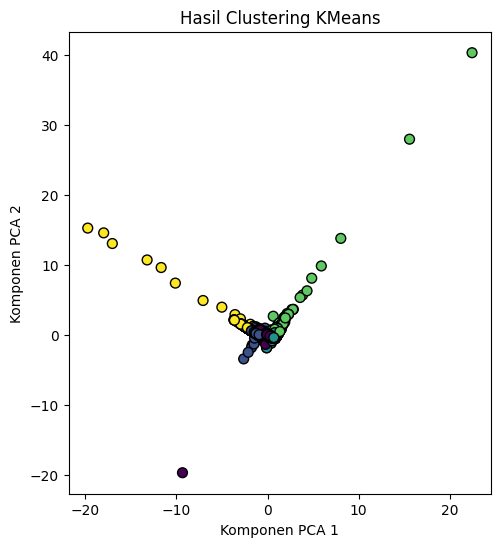

In [32]:
# Visualisasi hasil clustering KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')

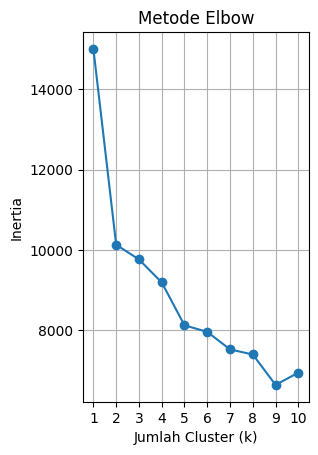

In [35]:
# Metode Elbow untuk menentukan nilai knee
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.subplot(1, 2, 2)
plt.plot(k_values, inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [36]:
# Model Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_model.fit_predict(features_scaled)

In [37]:
# Hitung dan visualisasikan Silhouette Score untuk Agglomerative Clustering
silhouette_agg = silhouette_score(features_scaled, agg_labels)
print(f'Silhouette Score untuk Agglomerative Clustering: {silhouette_agg:.4f}')

Silhouette Score untuk Agglomerative Clustering: 0.7333


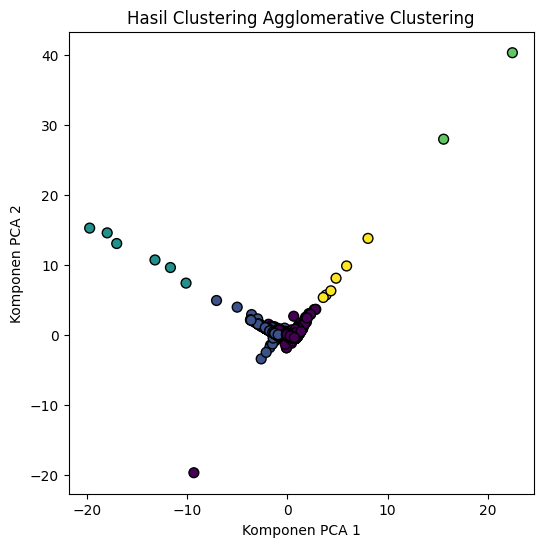

In [38]:
# Visualisasi hasil clustering Agglomerative Clustering
plt.figure(figsize=(6, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering Agglomerative Clustering')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

In [40]:
# Model DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(features_scaled)

In [41]:
# Hitung dan visualisasikan Silhouette Score untuk DBSCAN
# Hanya hitung jika terdapat lebih dari satu cluster
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(features_scaled, dbscan_labels)
    print(f'Silhouette Score untuk DBSCAN: {silhouette_dbscan:.4f}')
else:
    print('DBSCAN menghasilkan satu cluster. Silhouette Score tidak dapat dihitung.')

Silhouette Score untuk DBSCAN: 0.7299


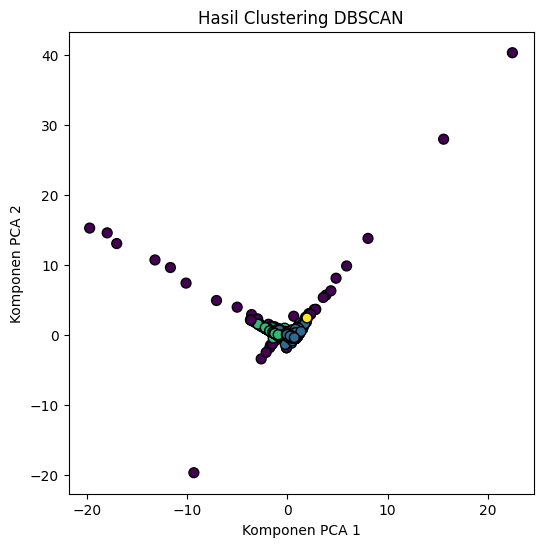

In [43]:
# Visualisasi hasil clustering DBSCAN
plt.figure(figsize=(6, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering DBSCAN')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

**Prompt:Explorasi Matriks Evaluasi clustering lain selain kedua diatas**

In [44]:
# Mengisi nilai yang hilang untuk CustomerID dan fitur lainnya
df['CustomerID'] = df['CustomerID'].fillna(-1)
df['Quantity'] = df['Quantity'].fillna(0)
df['UnitPrice'] = df['UnitPrice'].fillna(0)

In [45]:
# Mengambil sampel dari dataset untuk mengurangi penggunaan memori
sample_size = 5000  # Ambil 5000 entri
df_sample = df.sample(n=sample_size, random_state=42)

In [46]:
# Memilih fitur yang akan digunakan untuk clustering
features = df_sample[['Quantity', 'UnitPrice', 'CustomerID']]

In [47]:
# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [48]:
# Menggunakan PCA untuk mengurangi dimensi
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [49]:
# Model KMeans
kmeans_model = MiniBatchKMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_model.fit_predict(features_scaled)

In [50]:
# Menghitung metrik evaluasi untuk KMeans
silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(features_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(features_scaled, kmeans_labels)


In [51]:
print(f"KMeans - Silhouette Score: {silhouette_kmeans:.4f}, "
      f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}, "
      f"Calinski-Harabasz Index: {calinski_harabasz_kmeans:.4f}")

KMeans - Silhouette Score: 0.3676, Davies-Bouldin Index: 1.1742, Calinski-Harabasz Index: 1139.0583


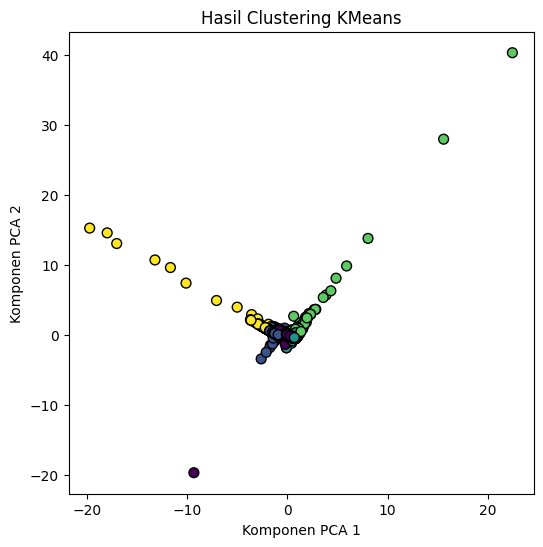

In [52]:
# Visualisasi hasil clustering KMeans
plt.figure(figsize=(6, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

In [53]:
# Model Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_model.fit_predict(features_scaled)

In [54]:
# Menghitung metrik evaluasi untuk Agglomerative Clustering
silhouette_agg = silhouette_score(features_scaled, agg_labels)
davies_bouldin_agg = davies_bouldin_score(features_scaled, agg_labels)
calinski_harabasz_agg = calinski_harabasz_score(features_scaled, agg_labels)

In [55]:
print(f"Agglomerative Clustering - Silhouette Score: {silhouette_agg:.4f}, "
      f"Davies-Bouldin Index: {davies_bouldin_agg:.4f}, "
      f"Calinski-Harabasz Index: {calinski_harabasz_agg:.4f}")

Agglomerative Clustering - Silhouette Score: 0.7333, Davies-Bouldin Index: 0.3573, Calinski-Harabasz Index: 5223.9878


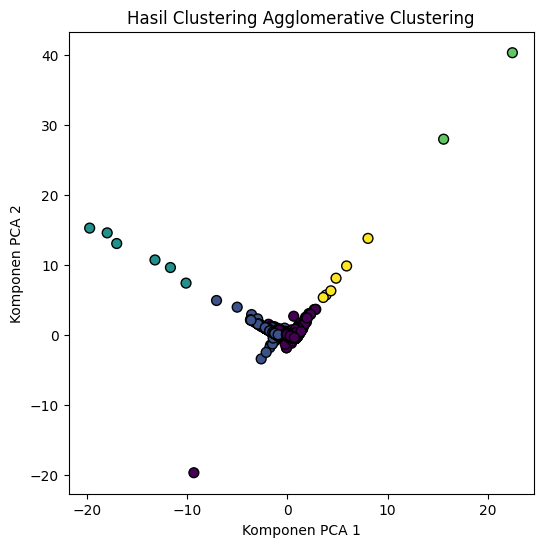

In [56]:
# Visualisasi hasil clustering Agglomerative Clustering
plt.figure(figsize=(6, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering Agglomerative Clustering')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

In [57]:
# Model DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(features_scaled)

In [58]:
# Menghitung metrik evaluasi untuk DBSCAN
# Hanya hitung jika terdapat lebih dari satu cluster
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(features_scaled, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(features_scaled, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(features_scaled, dbscan_labels)

    print(f"DBSCAN - Silhouette Score: {silhouette_dbscan:.4f}, "
          f"Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}, "
          f"Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print('DBSCAN menghasilkan satu cluster. Metrik evaluasi tidak dapat dihitung.')

DBSCAN - Silhouette Score: 0.7299, Davies-Bouldin Index: 1.8957, Calinski-Harabasz Index: 1151.1948


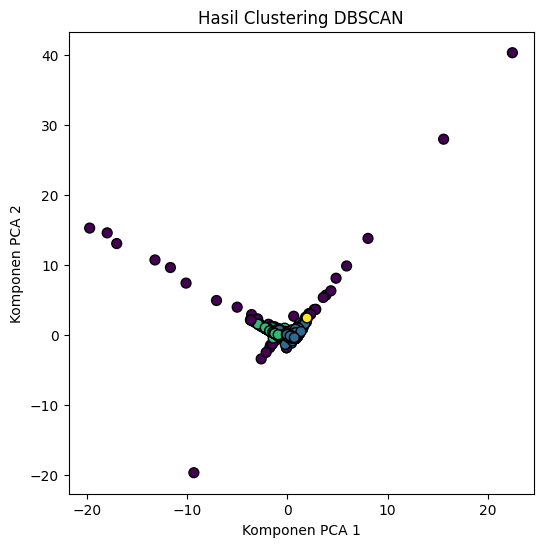

In [59]:
# Visualisasi hasil clustering DBSCAN
plt.figure(figsize=(6, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering DBSCAN')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

### **Berdasarkan hasil evaluasi menggunakan Silhouette Score, Davies-Bouldin Index, dan Calinski-Harabasz Index, model KMeans menunjukkan performa terbaik dengan nilai Silhouette tertinggi dan nilai Davies-Bouldin serta Calinski-Harabasz yang paling menguntungkan, menandakan pemisahan cluster yang baik dan konsistensi dalam kelompok.**